In [1]:
# data analysis and preprocessing
import random as rd
import numpy as np
import pandas as pd

#data vizualisation 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# split dataset and linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [5]:
house = pd.read_csv('house.csv')
house.head(8)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [5]:
house.shape

(21613, 21)

In [18]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [9]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

we have no missing values

The data is pretty clean. There are no pesky nulls which we need to treat and most of the features are in numeric format.
Let's go ahead and drop the "id" and "date" columns as these 2 features will not be used in this analysis.

In [10]:
house = house.drop(['id', 'date'],axis=1)

#                                            data vizualisation

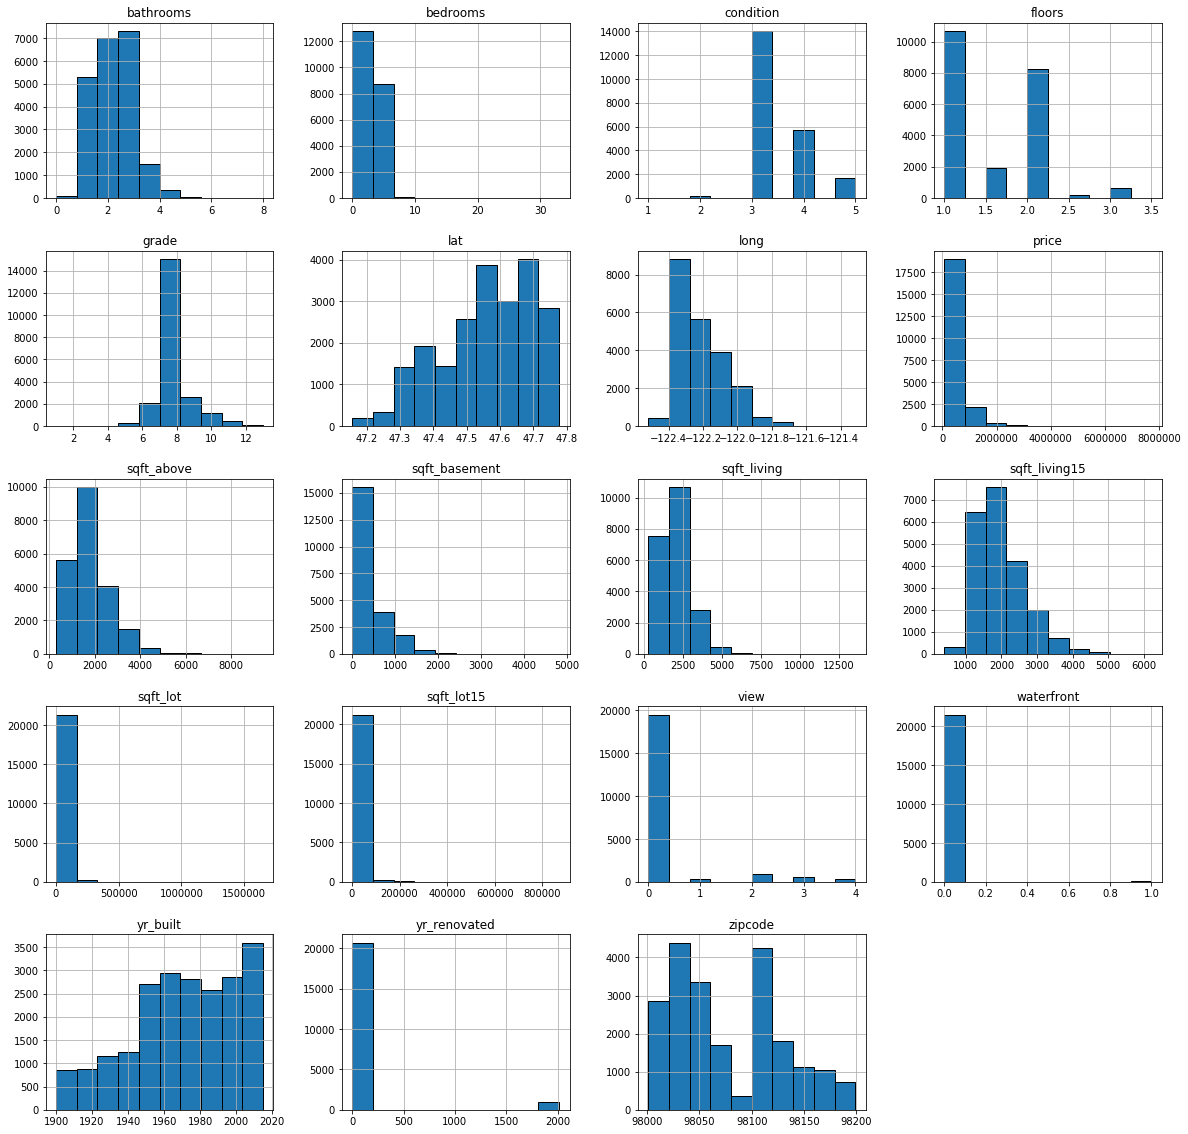

In [13]:
house.hist(bins=10,figsize=(20,20),grid=True,edgecolor='black')
plt.show()

### number of badrooms 

Text(0, 0.5, 'Count')

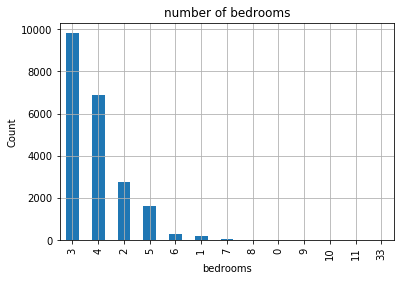

In [34]:
house['bedrooms'].value_counts().plot(kind='bar',grid='True')
plt.title('number of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('Count')

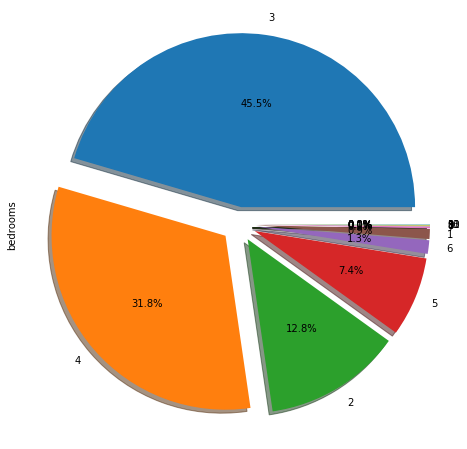

In [7]:
house.bedrooms.value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',shadow=True, figsize=(10,8))
plt.show()

As we can see from the visualization 3 bedroom houses are most commonly sold followed by 4 bedroom

### number of floors

Text(0, 0.5, 'count')

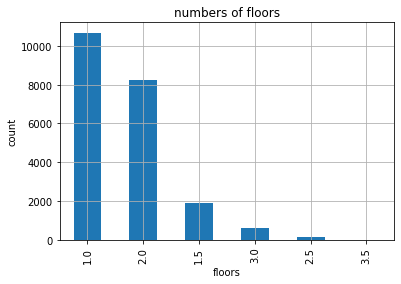

In [63]:
house.floors.value_counts().plot(kind='bar',grid='True')
plt.title('numbers of floors')
plt.xlabel('floors')
plt.ylabel('count')

# correlation 

### price vs square Feet

Text(0, 0.5, 'price')

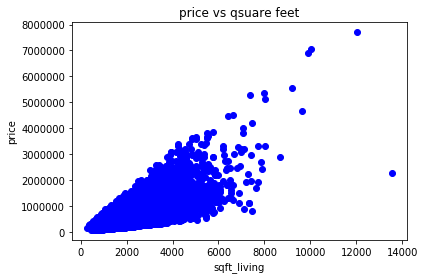

In [56]:
plt.scatter(house.sqft_living,house.price,c='blue')
plt.title('price vs qsuare feet')
plt.xlabel('sqft_living')
plt.ylabel('price')

### Price vs Location of the area

Text(0, 0.5, 'price')

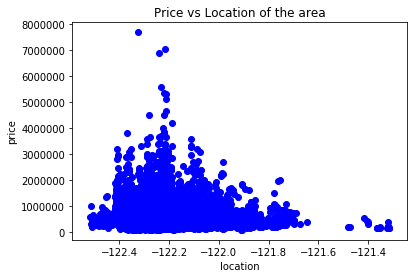

In [70]:
plt.scatter(house.long,house.price,c='blue')
plt.title("Price vs Location of the area")
plt.xlabel('location')
plt.ylabel('price')

### Latitude vs Price

Text(0.5, 1.0, 'Latitude vs Price')

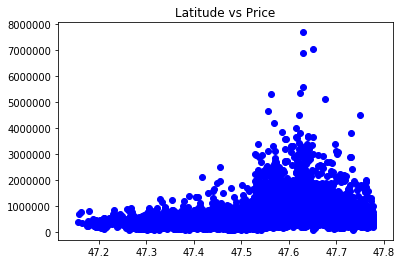

In [66]:
plt.scatter(house.lat,house.price,c='blue')
plt.title('Latitude vs Price')

### bedrooms vs price

Text(0, 0.5, 'price')

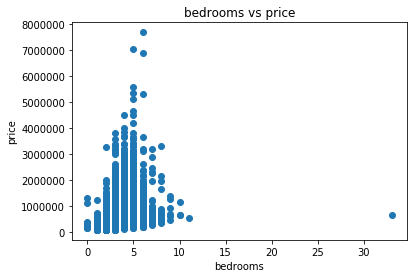

In [54]:
plt.scatter(house.bedrooms,house.price)
plt.title('bedrooms vs price')
plt.xlabel('bedrooms')
plt.ylabel('price')

### bathrooms vs prices

Text(0.5, 1.0, 'bathrooms vs price')

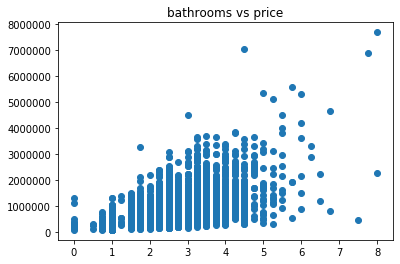

In [60]:
plt.scatter(house.bathrooms,house.price)
plt.title('bathrooms vs price')

### Waterfront vs Price

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront/1= waterfront)')

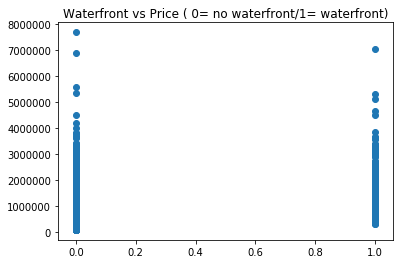

In [57]:

plt.scatter(house.waterfront,house.price)
plt.title("Waterfront vs Price ( 0= no waterfront/1= waterfront)")

### floors vs price 

Text(0, 0.5, 'price')

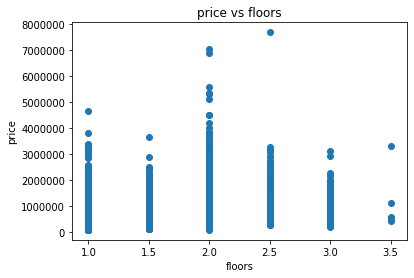

In [65]:
plt.scatter(house.floors,house.price)
plt.title('price vs floors')
plt.xlabel('floors')
plt.ylabel('price')

# correlation_map

In [52]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1,-0.017,0.0013,0.0052,-0.012,-0.13,0.019,-0.0027,0.012,-0.024,0.0081,-0.011,-0.0052,0.021,-0.017,-0.0082,-0.0019,0.021,-0.0029,-0.14
price,-0.017,1,0.31,0.53,0.7,0.09,0.26,0.27,0.4,0.036,0.67,0.61,0.32,0.054,0.13,-0.053,0.31,0.022,0.59,0.082
bedrooms,0.0013,0.31,1,0.52,0.58,0.032,0.18,-0.0066,0.08,0.028,0.36,0.48,0.3,0.15,0.019,-0.15,-0.0089,0.13,0.39,0.029
bathrooms,0.0052,0.53,0.52,1,0.75,0.088,0.5,0.064,0.19,-0.12,0.66,0.69,0.28,0.51,0.051,-0.2,0.025,0.22,0.57,0.087
sqft_living,-0.012,0.7,0.58,0.75,1,0.17,0.35,0.1,0.28,-0.059,0.76,0.88,0.44,0.32,0.055,-0.2,0.053,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.032,0.088,0.17,1,-0.0052,0.022,0.075,-0.009,0.11,0.18,0.015,0.053,0.0076,-0.13,-0.086,0.23,0.14,0.72
floors,0.019,0.26,0.18,0.5,0.35,-0.0052,1,0.024,0.029,-0.26,0.46,0.52,-0.25,0.49,0.0063,-0.059,0.05,0.13,0.28,-0.011
waterfront,-0.0027,0.27,-0.0066,0.064,0.1,0.022,0.024,1,0.4,0.017,0.083,0.072,0.081,-0.026,0.093,0.03,-0.014,-0.042,0.086,0.031
view,0.012,0.4,0.08,0.19,0.28,0.075,0.029,0.4,1,0.046,0.25,0.17,0.28,-0.053,0.1,0.085,0.0062,-0.078,0.28,0.073
condition,-0.024,0.036,0.028,-0.12,-0.059,-0.009,-0.26,0.017,0.046,1,-0.14,-0.16,0.17,-0.36,-0.061,0.003,-0.015,-0.11,-0.093,-0.0034


In [27]:
house.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1,0.31,0.53,0.7,0.09,0.26,0.27,0.4,0.036,0.67,0.61,0.32,0.054,0.13,-0.053,0.31,0.022,0.59,0.082
bedrooms,0.31,1,0.52,0.58,0.032,0.18,-0.0066,0.08,0.028,0.36,0.48,0.3,0.15,0.019,-0.15,-0.0089,0.13,0.39,0.029
bathrooms,0.53,0.52,1,0.75,0.088,0.5,0.064,0.19,-0.12,0.66,0.69,0.28,0.51,0.051,-0.2,0.025,0.22,0.57,0.087
sqft_living,0.7,0.58,0.75,1,0.17,0.35,0.1,0.28,-0.059,0.76,0.88,0.44,0.32,0.055,-0.2,0.053,0.24,0.76,0.18
sqft_lot,0.09,0.032,0.088,0.17,1,-0.0052,0.022,0.075,-0.009,0.11,0.18,0.015,0.053,0.0076,-0.13,-0.086,0.23,0.14,0.72
floors,0.26,0.18,0.5,0.35,-0.0052,1,0.024,0.029,-0.26,0.46,0.52,-0.25,0.49,0.0063,-0.059,0.05,0.13,0.28,-0.011
waterfront,0.27,-0.0066,0.064,0.1,0.022,0.024,1,0.4,0.017,0.083,0.072,0.081,-0.026,0.093,0.03,-0.014,-0.042,0.086,0.031
view,0.4,0.08,0.19,0.28,0.075,0.029,0.4,1,0.046,0.25,0.17,0.28,-0.053,0.1,0.085,0.0062,-0.078,0.28,0.073
condition,0.036,0.028,-0.12,-0.059,-0.009,-0.26,0.017,0.046,1,-0.14,-0.16,0.17,-0.36,-0.061,0.003,-0.015,-0.11,-0.093,-0.0034
grade,0.67,0.36,0.66,0.76,0.11,0.46,0.083,0.25,-0.14,1,0.76,0.17,0.45,0.014,-0.18,0.11,0.2,0.71,0.12


As we can see from all the above representation that many factors are affecting the prices of the house , like square feet which increases the price of the house and even location influencing the prices of the house.

# dataset split

In [30]:
x=house['sqft_living'].values[:,np.newaxis]
y=house['price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
reg.fit(x_train,y_train)
predicted=reg.predict(x_test)
print('MSE',mean_squared_error(y_test,predicted))
print('R squarded',metrics.r2_score(y_test,predicted))

MSE 62902408306.86502
R squarded 0.4996528488387417


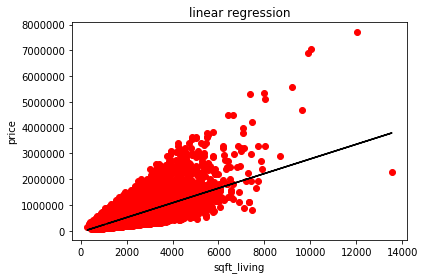

In [31]:
plt.scatter(x,y,color='r')
plt.title('linear regression')
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.plot(x,reg.predict(x),color='k')
plt.show()

In [63]:
x=house['long'].values[:,np.newaxis]
y=house['price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
reg.fit(x_train,y_train)
predicted=reg.predict(x_test)
print('MSE',mean_squared_error(y_test,predicted))
print('R squarded',metrics.r2_score(y_test,predicted))

MSE 125632797217.05615
R squarded 0.0006739984689312362


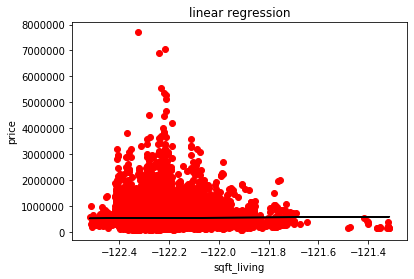

In [65]:
plt.scatter(x,y,color='r')
plt.title('linear regression')
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.plot(x,reg.predict(x),color='k')
plt.show()

In [47]:
x=house['bedrooms'].values[:,np.newaxis]
y=house['price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
reg.fit(x_train,y_train)
predicted=reg.predict(x_test)
print('MSE',mean_squared_error(y_test,predicted))
print('R squarded',metrics.r2_score(y_test,predicted))

MSE 113635389576.10475
R squarded 0.09610545961721928


In [69]:
x=house['bathrooms'].values[:,np.newaxis]
y=house['price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
reg.fit(x_train,y_train)
predicted=reg.predict(x_test)
print('MSE',mean_squared_error(y_test,predicted))
print('R squarded',metrics.r2_score(y_test,predicted))

MSE 89550909069.11131
R squarded 0.2876816096127013


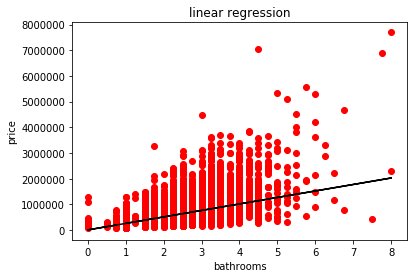

In [70]:
plt.scatter(x,y,color='red')
plt.title('linear regression')
plt.ylabel('price')
plt.xlabel('bathrooms')
plt.plot(x,reg.predict(x),color='k')
plt.show()

In [71]:
x=house['lat'].values[:,np.newaxis]
y=house['price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
reg.fit(x_train,y_train)
predicted=reg.predict(x_test)
print('MSE',mean_squared_error(y_test,predicted))
print('R squarded',metrics.r2_score(y_test,predicted))

MSE 113502118121.89139
R squarded 0.09716554609469519


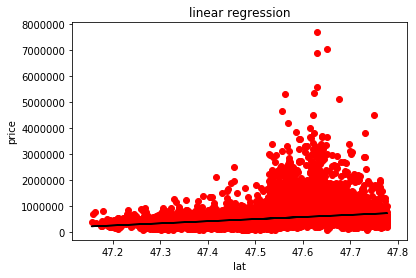

In [72]:
plt.scatter(x,y,color='red')
plt.title('linear regression')
plt.ylabel('price')
plt.xlabel('lat')
plt.plot(x,reg.predict(x),color='k')
plt.show()

# multi_linear regression

In [29]:
x=house[['lat','bedrooms','bathrooms','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y=house['price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
reg.fit(x_train,y_train)
predicted=reg.predict(x_test)
print('MSE',mean_squared_error(y_test,predicted))
print('R squarded',metrics.r2_score(y_test,predicted))

MSE 37481882159.365364
R squarded 0.7018563602984706
